# Linear Regression

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import re

In [25]:
###データ読込(結合したデータ)
train = pd.read_csv("~/repo/study/JLeague/data/train_new.csv")
test = pd.read_csv("~/repo/study/JLeague/data/test_new.csv")

## Feature Enginiering

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 43 columns):
id             1721 non-null int64
y              1721 non-null int64
year           1721 non-null int64
stage          1721 non-null object
match          1721 non-null object
gameday        1721 non-null object
time           1721 non-null object
home           1721 non-null object
away           1721 non-null object
stadium        1721 non-null object
tv             1721 non-null object
home_score     1721 non-null int64
away_score     1721 non-null int64
weather        1721 non-null object
temperature    1721 non-null float64
humidity       1721 non-null object
referee        1721 non-null object
home_team      1721 non-null object
home_01        1721 non-null object
home_02        1721 non-null object
home_03        1721 non-null object
home_04        1721 non-null object
home_05        1721 non-null object
home_06        1721 non-null object
home_07        1721 non-null obje

In [27]:
train["stage"] = pd.get_dummies(train["stage"])
test["stage"] = pd.get_dummies(test["stage"])

In [28]:
for i, weather in enumerate(train["weather"]):
    weather = str(weather)
    if re.match("雨", weather):
        train.ix[i, "rain"] = 1
    else:
        train.ix[i, "rain"] = 0
for i, weather in enumerate(test["weather"]):
    weather = str(weather)
    if re.match("雨", weather):
        test.ix[i, "rain"] = 1
    else:
        test.ix[i, "rain"] = 0

/home/tsu-nera/anaconda3/envs/opt/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/tsu-nera/anaconda3/envs/opt/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [29]:
for i, m in enumerate(train["match"]):
    match = re.findall("第(\w+)節第(\w+)日", str(m))[0]
    train.ix[i, "match2"] = int(match[0])
    train.ix[i, "match3"] = int(match[1])
for i, m in enumerate(test["match"]):
    match = re.findall("第(\w+)節第(\w+)日", str(m))[0]
    test.ix[i, "match2"] = int(match[0])
    test.ix[i, "match3"] = int(match[1])

In [30]:
for i, tv in enumerate(train["tv"]):
    tv = str(tv)
    tvlist = tv.split("／")
    train.ix[i, "media"] = int(len(tvlist))
for i, tv in enumerate(test["tv"]):
    tv = str(tv)
    tvlist = tv.split("／")
    test.ix[i, "media"] = int(len(tvlist))

In [31]:
for i, day in enumerate(train["gameday"]):
    day = str(day)
    train.ix[i, "month"] = int(day[:2])
    train.ix[i, "day"] = int(day[3:5])
    weekday = day[5:]
    if re.match("\(\w・祝\)", weekday):
        train.ix[i, "weekday"] = 0
    elif re.match("\(\w・休\)", weekday):
        train.ix[i, "weekday"] = 0
    elif weekday == "(土)":
        train.ix[i, "weekday"] = 1
    elif weekday == "(日)":
        train.ix[i, "weekday"] = 2
    else:
        train.ix[i, "weekday"] = 3
for i, day in enumerate(test["gameday"]):
    day = str(day)
    test.ix[i, "month"] = int(day[:2])
    test.ix[i, "day"] = int(day[3:5])
    weekday = day[5:]
    if re.match("\(\w・祝\)", weekday):
        test.ix[i, "weekday"] = 0
    elif re.match("\(\w・休\)", weekday):
        test.ix[i, "weekday"] = 0
    elif weekday == "(土)":
        test.ix[i, "weekday"] = 1
    elif weekday == "(日)":
        test.ix[i, "weekday"] = 2
    else:
        test.ix[i, "weekday"] = 3

In [32]:
from dateutil.parser import parse
for i, t in enumerate(train["time"]):
    train.ix[i, "hour"] = int(str(t)[:2])
for i, t in enumerate(test["time"]):
    test.ix[i, "hour"] = int(str(t)[:2])

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["home"])
train["home"] = le.transform(train["home"])
train["away"] = le.transform(train["away"])
test["home"] = le.transform(test["home"])
test["away"] = le.transform(test["away"])

In [34]:
for i, t in enumerate(train["humidity"]):
    train.ix[i, "humid"] = int(str(t)[:2])
for i, t in enumerate(test["humidity"]):
    test.ix[i, "humid"] = int(str(t)[:2])

In [35]:
#train = pd.get_dummies(train)

In [36]:
train[train.y == 0]

,id,y,year,stage,match,gameday,time,home,away,stadium,...,capa,rain,match2,match3,media,month,day,weekday,hour,humid
1385,15699,0,2014,1,第４節第１日,03/23(日),15:04,35,36,埼玉スタジアム２００２,...,63700,0.0,4.0,1.0,3.0,3.0,23.0,2.0,15.0,23.0


In [37]:
train = train.drop(labels=1385, axis=0)

In [38]:
test_id = test["id"]
train2 = train[["y", "year","temperature", "capa", "home_score", "away_score", "stage", "month", "day", "weekday", "home", "away", "media"]]
test2 = test[["temperature", "capa", "home_score", "away_score", "stage", "month", "day", "weekday", "home", "away", "media"]]

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f71c4dcef60>>
Traceback (most recent call last):
  File "/home/tsu-nera/anaconda3/envs/opt/lib/python3.6/site-packages/xgboost-0.6-py3.6.egg/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


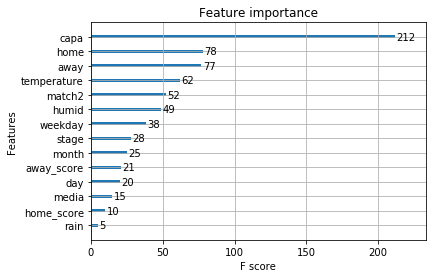

In [154]:
xgboost.plot_importance(model)

In [43]:
test_id = test["id"]
train2 = train[["y", "year", "temperature", "capa", "home_score", "away_score", "stage", "month", "day", "weekday", "home", "away", "media", "rain", "humid", "match2", "match3"]]
test2 = test[["temperature", "capa", "home_score", "away_score", "stage", "month", "day", "weekday", "home", "away", "media", "rain", 
 "humid", "match2", "match3"]]

In [39]:
y = train2["y"]
train2 = train2.drop(["y", "year"], axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train2, y, test_size=0.2, random_state=17)

## build model

In [41]:
import xgboost
from xgboost import XGBRegressor
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

In [42]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [43]:
pred = model.predict(X_test)

In [44]:
np.sqrt(mean_squared_error(y_test, pred))

3753.063848706553

In [43]:
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = np.sqrt(mean_squared_error(y_test, predictions))
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy))

Thresh=0.025, n=9, Accuracy: 3469.33%
Thresh=0.048, n=8, Accuracy: 3457.53%
Thresh=0.051, n=7, Accuracy: 3565.32%
Thresh=0.052, n=6, Accuracy: 3532.96%
Thresh=0.096, n=5, Accuracy: 3600.31%
Thresh=0.119, n=4, Accuracy: 3534.07%
Thresh=0.143, n=3, Accuracy: 3678.24%
Thresh=0.169, n=2, Accuracy: 3635.25%
Thresh=0.297, n=1, Accuracy: 4471.36%


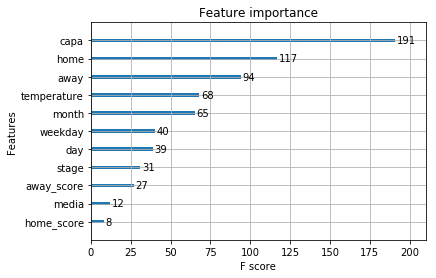

In [45]:
xgboost.plot_importance(model)

## submit

In [46]:
pred = model.predict(test2)

In [47]:
submissions = pd.DataFrame({
    "id": test_id,
    "prediction": pred})
submissions.to_csv("~/repo/study/JLeague/submit/submit_1122_1_xgboost.csv", index=False, header=False)